In [1]:
# Data Preparation for Online Retail Dataset
# This script processes the Online Retail dataset through loading, understanding, cleaning, transforming, and feature engineering.

# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding and scaling
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime  # For date handling
import warnings  # To suppress warnings for cleaner output
warnings.filterwarnings('ignore')  # Ignore warnings for readability

# Set pandas display options for better readability
pd.set_option('display.max_columns', 10)  # Limit columns displayed
pd.set_option('display.width', 1000)  # Set display width
%matplotlib inline 

In [2]:
# -----------------------------------------------
# Step 1: Load the Data
# -----------------------------------------------
df=pd.read_excel(r"C:\Users\LENOVO\Downloads\Dataset_Identify customer segments for online retail with the use of K-means clustering\Online Retail.xlsx")


In [3]:
print(f"Data loaded successfully. Shape: {df.shape}")

Data loaded successfully. Shape: (541909, 8)


In [4]:
# -----------------------------------------------
# Step 2: Understand the Data
# -----------------------------------------------
# Display the first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# Display summary statistics
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
# Check for missing values across all columns
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

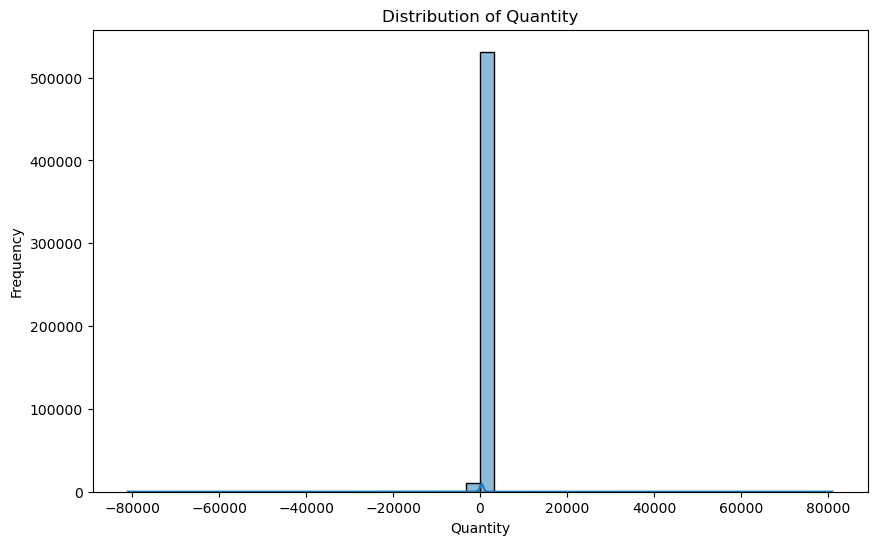

In [8]:
# Visualization 1: Distribution of Quantity
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'].dropna(), bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

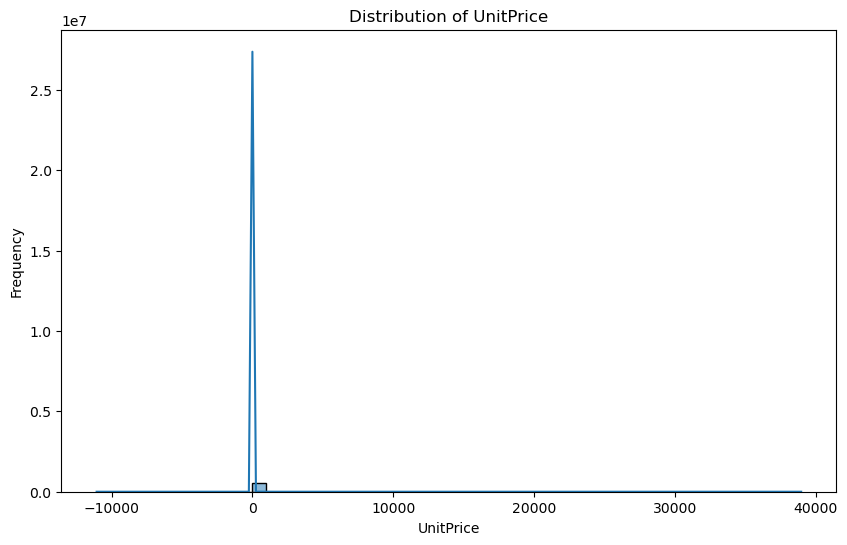

In [9]:
# Visualization 2: Distribution of UnitPrice
plt.figure(figsize=(10, 6))
sns.histplot(df['UnitPrice'].dropna(), bins=50, kde=True)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

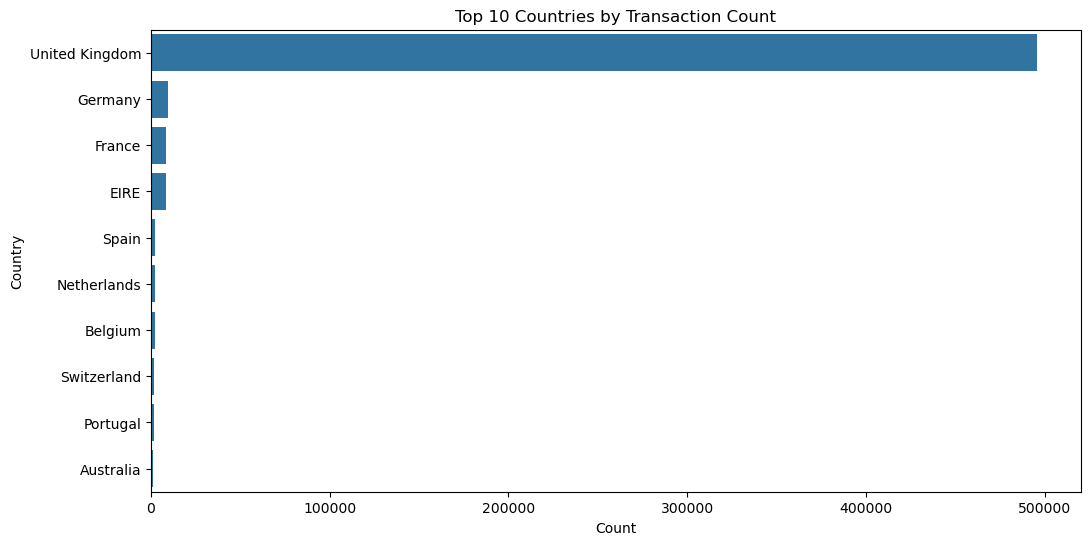

In [10]:
# Visualization 3: Count of Transactions by Country
plt.figure(figsize=(12, 6))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index[:10])
plt.title('Top 10 Countries by Transaction Count')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

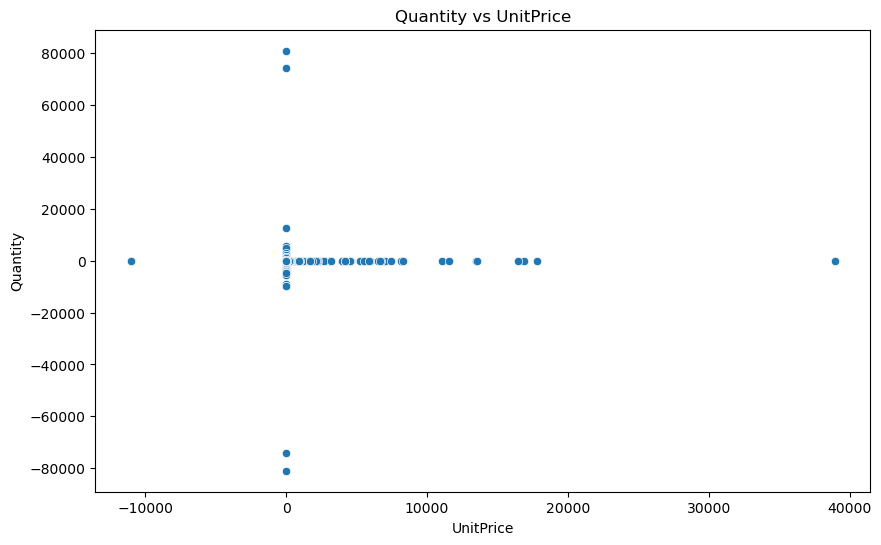

In [11]:
# Visualization 4: Quantity vs UnitPrice Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=df)
plt.title('Quantity vs UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')
plt.show()

In [12]:
# -----------------------------------------------
# Step 3: Clean the Data
# -----------------------------------------------

#Check missing values in detail before cleaning
print("\nDetailed Missing Values Check:")
for column in df.columns:
    missing_count = df[column].isnull().sum()
    if missing_count > 0:
        print(f"{column}: {missing_count} missing values ({(missing_count / len(df) * 100):.2f}%)")


Detailed Missing Values Check:
Description: 1454 missing values (0.27%)
CustomerID: 135080 missing values (24.93%)


In [13]:
# Check Quantity and UnitPrice values before removing negative/zero values
print("\nQuantity and UnitPrice Statistics (before removing negatives/zeros):")
print("Quantity Stats:")
print(df['Quantity'].describe())
print("\nUnitPrice Stats:")
print(df['UnitPrice'].describe())


Quantity and UnitPrice Statistics (before removing negatives/zeros):
Quantity Stats:
count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

UnitPrice Stats:
count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64


In [14]:
# Handle missing values
df = df.dropna(subset=['Description', 'CustomerID'])
print(f"\nShape after dropping missing 'Description' and 'CustomerID': {df.shape}")
print(f"Missing values after dropping: {df.isnull().sum().sum()}")


Shape after dropping missing 'Description' and 'CustomerID': (406829, 8)
Missing values after dropping: 0


In [15]:
# Remove duplicate rows
initial_rows = df.shape[0]
df = df.drop_duplicates()
print(f"Shape after removing {initial_rows - df.shape[0]} duplicates: {df.shape}")

Shape after removing 5225 duplicates: (401604, 8)


In [16]:
# Correct data types
df['CustomerID'] = df['CustomerID'].astype(int)

In [17]:
# Remove rows with negative or zero quantities
quantity_positive_count = df[df['Quantity'] > 0].shape[0]
print(f"\nNumber of rows with positive Quantity: {quantity_positive_count} out of {df.shape[0]}")
df = df[df['Quantity'] > 0]
print(f"Shape after removing negative/zero quantities: {df.shape}")


Number of rows with positive Quantity: 392732 out of 401604
Shape after removing negative/zero quantities: (392732, 8)


In [18]:
# Remove rows with negative or zero prices
unitprice_positive_count = df[df['UnitPrice'] > 0].shape[0]
print(f"Number of rows with positive UnitPrice: {unitprice_positive_count} out of {df.shape[0]}")
df = df[df['UnitPrice'] > 0]
print(f"Shape after removing negative/zero prices: {df.shape}")

Number of rows with positive UnitPrice: 392692 out of 392732
Shape after removing negative/zero prices: (392692, 8)


In [19]:
#Drop rows with invalid dates
df = df.dropna(subset=['InvoiceDate'])
print(f"Shape after removing invalid dates: {df.shape}")

Shape after removing invalid dates: (392692, 8)


In [20]:
# -----------------------------------------------
# Step 4: Transform the Data
# -----------------------------------------------
print("\nStep 4: Transforming the Data")

# Encode categorical variables using pd.get_dummies
df = pd.get_dummies(df, columns=['Country'], prefix='Country')
print("Country column one-hot encoded.")


Step 4: Transforming the Data
Country column one-hot encoded.


In [21]:
# Display first few rows after transformation
print("\nFirst 5 rows after transformation:")
print(df.head())


First 5 rows after transformation:
  InvoiceNo StockCode                          Description  Quantity         InvoiceDate  ...  Country_Switzerland  Country_USA  Country_United Arab Emirates  Country_United Kingdom  Country_Unspecified
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00  ...                False        False                         False                    True                False
1    536365     71053                  WHITE METAL LANTERN         6 2010-12-01 08:26:00  ...                False        False                         False                    True                False
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00  ...                False        False                         False                    True                False
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00  ...                False        False                         

In [22]:
# -----------------------------------------------
# Step 5: Feature Engineering
# -----------------------------------------------
print("\nStep 5: Feature Engineering")


Step 5: Feature Engineering


In [23]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

In [24]:
customer_freq = df.groupby('CustomerID')['Description'].nunique().reset_index()  # Using Description as proxy
customer_freq.columns = ['CustomerID', 'PurchaseFrequency']
df = df.merge(customer_freq, on='CustomerID', how='left')
print("New features created: TotalPrice, Year, Month, Day, Hour, PurchaseFrequency")

New features created: TotalPrice, Year, Month, Day, Hour, PurchaseFrequency


In [25]:
# -----------------------------------------------
# Step 6: Scale the Data for K-means
# -----------------------------------------------
print("\nStep 6: Scaling the Data for K-means")

# Select numerical features to scale
numerical_features = ['Quantity', 'UnitPrice', 'TotalPrice', 'PurchaseFrequency', 'Year', 'Month', 'Day', 'Hour']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("Numerical features scaled using StandardScaler.")
print("\nScaled feature statistics:")
print(df[numerical_features].describe())


Step 6: Scaling the Data for K-means
Numerical features scaled using StandardScaler.

Scaled feature statistics:
           Quantity     UnitPrice    TotalPrice  PurchaseFrequency          Year         Month           Day          Hour
count  3.926920e+05  3.926920e+05  3.926920e+05       3.926920e+05  3.926920e+05  3.926920e+05  3.926920e+05  3.926920e+05
mean  -1.737038e-18 -2.648983e-17  2.316051e-18       8.106179e-18  9.518391e-14  2.779261e-16 -1.389631e-17 -6.079634e-17
std    1.000001e+00  1.000001e+00  1.000001e+00       1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00
min   -6.714792e-02 -1.404973e-01 -7.274376e-02      -7.082383e-01 -3.781230e+00 -1.933192e+00 -1.623187e+00 -2.952367e+00
25%   -6.160752e-02 -8.434179e-02 -5.683564e-02      -5.181160e-01  2.644642e-01 -7.618925e-01 -9.297470e-01 -7.561663e-01
50%   -3.944595e-02 -5.286953e-02 -3.272754e-02      -3.336689e-01  2.644642e-01  1.165820e-01 -5.161023e-03  1.223142e-01
75%   -6.203589e-03  2.80

In [26]:
# -----------------------------------------------
# Step 7: Determine the Optimal Number of Clusters (Elbow Method)
# -----------------------------------------------
# Prepare data for clustering (include standardized numerical features and one-hot encoded Country columns)
features_for_clustering = numerical_features + [col for col in df.columns if col.startswith('Country_')]
X = df[features_for_clustering]

In [27]:
# Calculate WCSS for different numbers of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):  # Test k from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

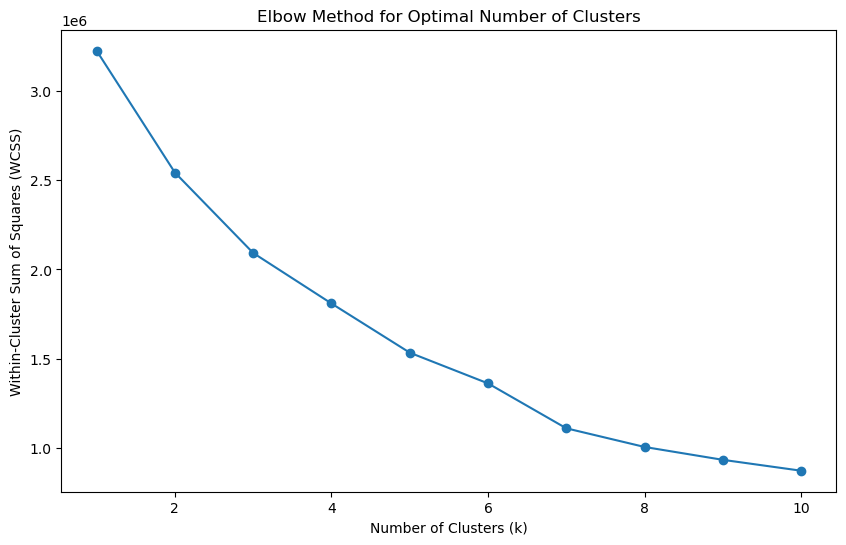

In [28]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [29]:
optimal_k = 2 
print(f"Suggested optimal number of clusters (based on elbow): {optimal_k}")

Suggested optimal number of clusters (based on elbow): 2


In [30]:
# -----------------------------------------------
# Step 8: Run K-means Clustering
# -----------------------------------------------
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

In [31]:
# Display cluster assignments
print("\nCluster assignments for the first 5 rows:")
print(df[['Cluster'] + features_for_clustering].head())


Cluster assignments for the first 5 rows:
   Cluster  Quantity  UnitPrice  TotalPrice  PurchaseFrequency  ...  Country_Switzerland  Country_USA  Country_United Arab Emirates  Country_United Kingdom  Country_Unspecified
0        0 -0.039446  -0.025893   -0.023566          -0.651485  ...                False        False                         False                    True                False
1        0 -0.039446   0.011873   -0.007366          -0.651485  ...                False        False                         False                    True                False
2        0 -0.028365  -0.016901   -0.002030          -0.651485  ...                False        False                         False                    True                False
3        0 -0.039446   0.011873   -0.007366          -0.651485  ...                False        False                         False                    True                False
4        0 -0.039446   0.011873   -0.007366          -0.651485  ...     

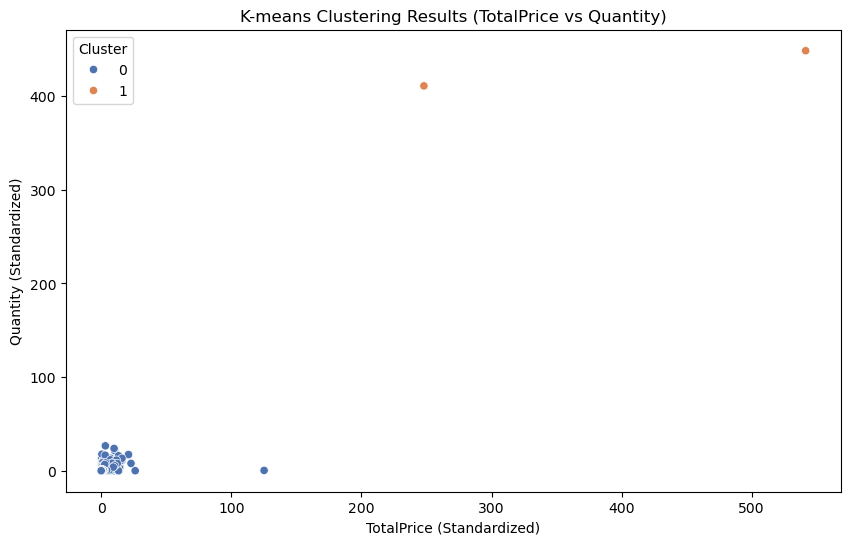

In [32]:
#Visualizing cluster results 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPrice', y='Quantity', hue='Cluster', data=df, palette='deep')
plt.title('K-means Clustering Results (TotalPrice vs Quantity)')
plt.xlabel('TotalPrice (Standardized)')
plt.ylabel('Quantity (Standardized)')
plt.legend(title='Cluster')
plt.show()

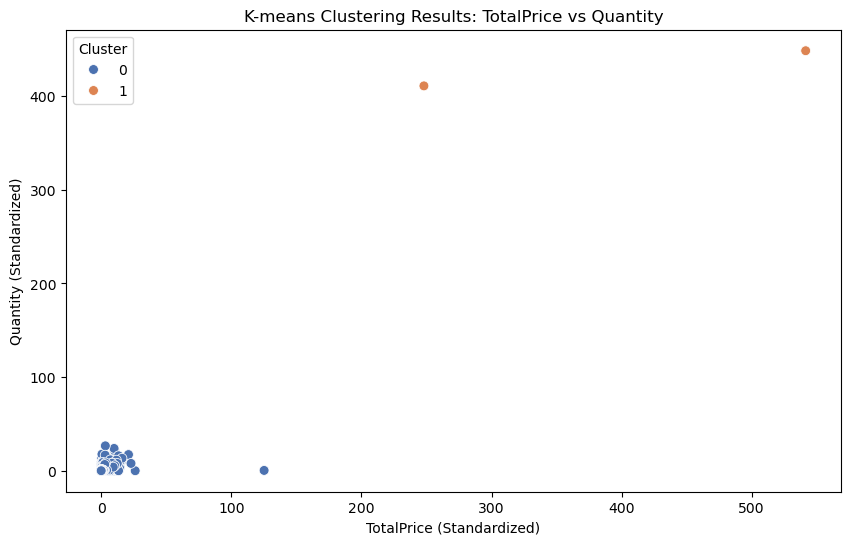

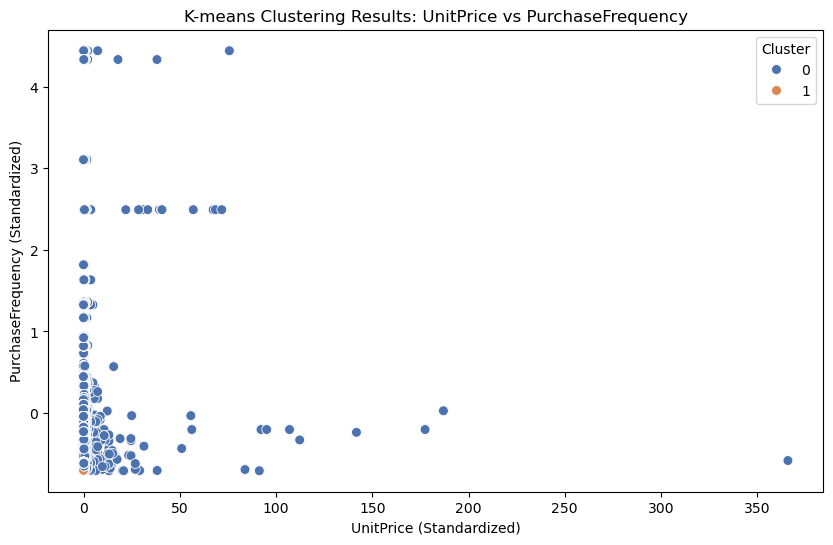

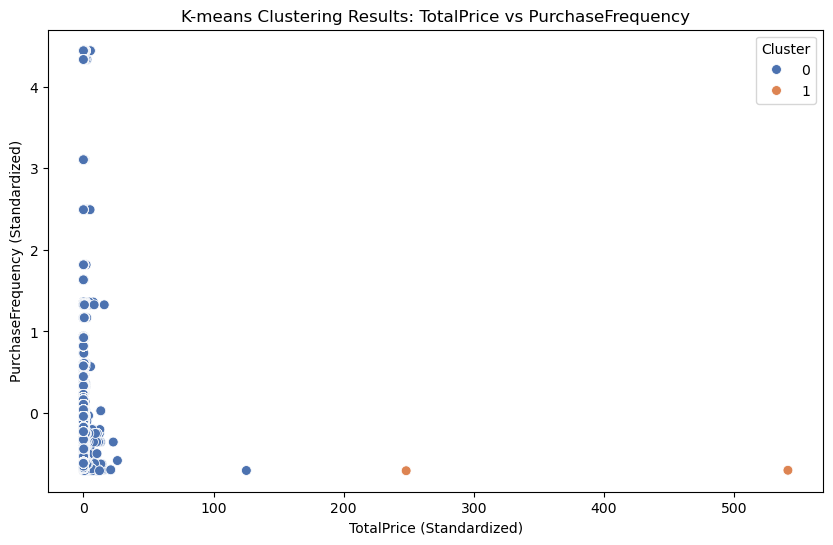

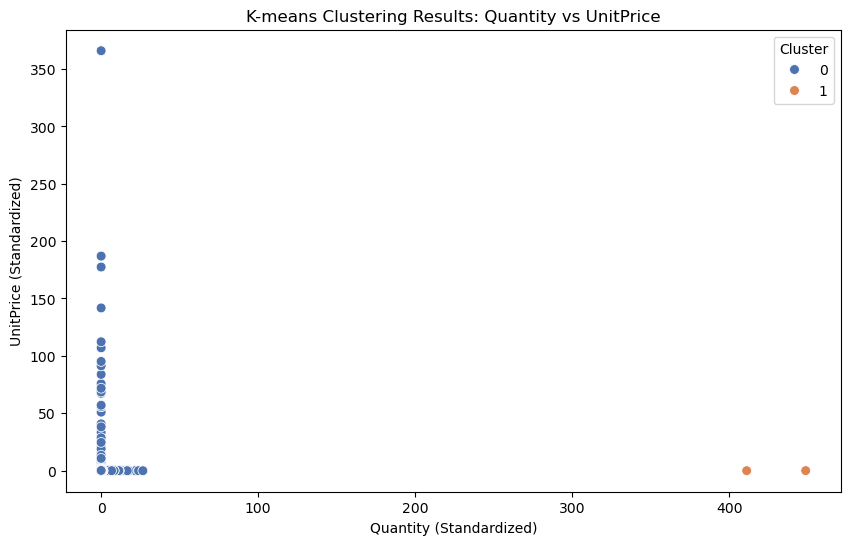

In [33]:
# Define pairs of features to visualize
feature_pairs = [
    ('TotalPrice', 'Quantity'),
    ('UnitPrice', 'PurchaseFrequency'),
    ('TotalPrice', 'PurchaseFrequency'),
    ('Quantity', 'UnitPrice')
    
]

# Create scatter plots for each pair
for i, (x_feature, y_feature) in enumerate(feature_pairs, 1):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_feature, y=y_feature, hue='Cluster', data=df, palette='deep', s=50)
    plt.title(f'K-means Clustering Results: {x_feature} vs {y_feature}')
    plt.xlabel(x_feature + ' (Standardized)')
    plt.ylabel(y_feature + ' (Standardized)')
    plt.legend(title='Cluster')
    plt.show()

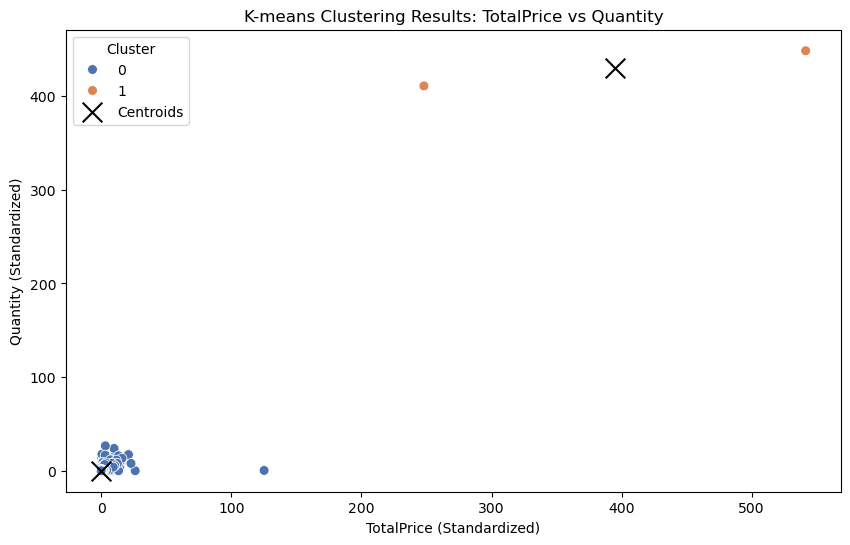

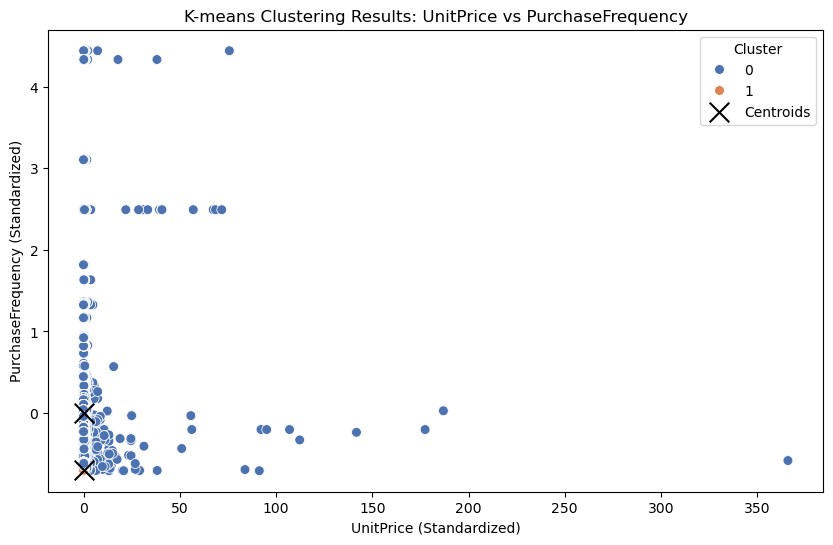

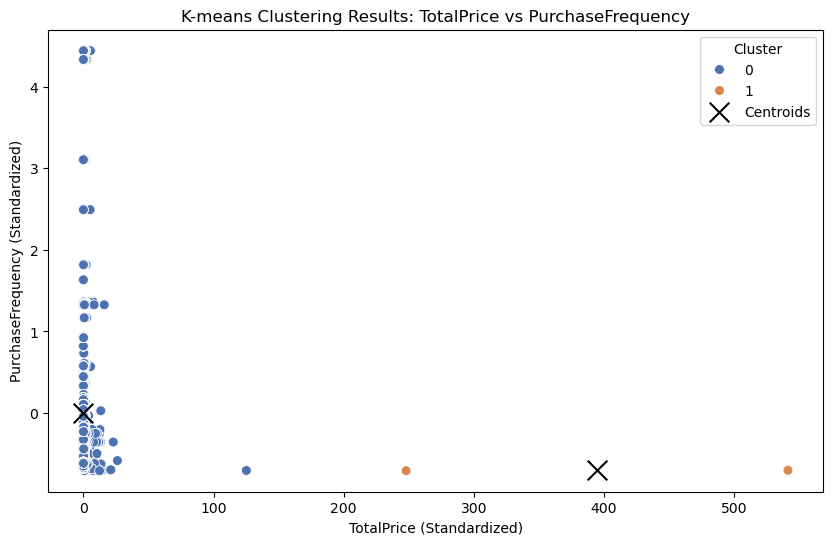

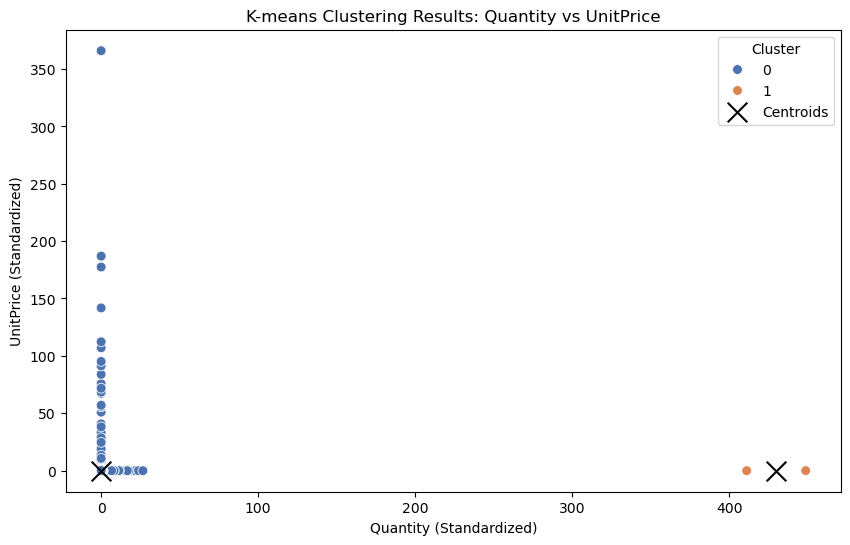

In [34]:
# Create scatter plots for each pair with centroids
centroids = kmeans.cluster_centers_
for i, (x_feature, y_feature) in enumerate(feature_pairs, 1):
    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(x=x_feature, y=y_feature, hue='Cluster', data=df, palette='deep', s=50)
    # Plot centroids
    centroid_x = centroids[:, numerical_features.index(x_feature)]
    centroid_y = centroids[:, numerical_features.index(y_feature)]
    plt.scatter(centroid_x, centroid_y, c='black', s=200, marker='x', label='Centroids')
    plt.title(f'K-means Clustering Results: {x_feature} vs {y_feature}')
    plt.xlabel(x_feature + ' (Standardized)')
    plt.ylabel(y_feature + ' (Standardized)')
    plt.legend(title='Cluster')
    plt.show()

In [69]:
# -----------------------------------------------
# Step 10: Analyze Each Segment
# -----------------------------------------------
print("\nStep 10: Analyze Each Segment")

# Calculate summary statistics for each cluster
summary_stats = df.groupby('Cluster')[numerical_features].agg(['mean', 'median', 'std'])
print("\nSummary Statistics for Each Cluster:")
print(summary_stats)


Step 10: Analyze Each Segment

Summary Statistics for Each Cluster:
           Quantity                            UnitPrice            ...       Day                Hour                    
               mean      median        std          mean    median  ...    median       std      mean    median       std
Cluster                                                             ...                                                  
0         -0.002189   -0.039446   0.238700  3.585733e-07 -0.052870  ... -0.005161  1.000003  0.000007  0.122314  0.999999
1        429.889532  429.889532  26.561665 -7.040408e-02 -0.070404  ... -0.178521  0.735504 -1.415027 -1.415027  0.310590

[2 rows x 24 columns]


In [79]:
#Compare segments
mean_values = summary_stats.xs('mean', axis=1, level=1)  
print("\nComparison of Segments (Mean Values):")
print(mean_values)


Comparison of Segments (Mean Values):
           Quantity     UnitPrice  TotalPrice  PurchaseFrequency      Year     Month           Day      Hour
Cluster                                                                                                     
0         -0.002189  3.585733e-07   -0.002010           0.000004 -0.000001  0.000002  9.092205e-07  0.000007
1        429.889532 -7.040408e-02  394.742626          -0.705401  0.264464 -0.322655 -1.785209e-01 -1.415027


In [81]:
# -----------------------------------------------
# Step 11: Profile the Customer Segments
# -----------------------------------------------
# Create profiles based on mean values
cluster_profiles = []
for cluster in range(optimal_k):
    mean_values_cluster = mean_values.loc[cluster]
    profile = f"Cluster {cluster}: "
    profile += f"Typical customers have a mean TotalPrice of {mean_values_cluster['TotalPrice']:.2f} (standardized), "
    profile += f"Quantity of {mean_values_cluster['Quantity']:.2f}, UnitPrice of {mean_values_cluster['UnitPrice']:.2f}, "
    profile += f"and PurchaseFrequency of {mean_values_cluster['PurchaseFrequency']:.2f}. "
    profile += "This segment likely represents "
    if mean_values_cluster['TotalPrice'] > 0:
        profile += "high-spending customers with frequent purchases."
    elif mean_values_cluster['TotalPrice'] < 0:
        profile += "low-spending customers with infrequent purchases."
    else:
        profile += "average-spending customers with moderate purchase behavior."
    cluster_profiles.append(profile)
    

In [83]:
# Print profiles
for profile in cluster_profiles:
    print(profile)

Cluster 0: Typical customers have a mean TotalPrice of -0.00 (standardized), Quantity of -0.00, UnitPrice of 0.00, and PurchaseFrequency of 0.00. This segment likely represents low-spending customers with infrequent purchases.
Cluster 1: Typical customers have a mean TotalPrice of 394.74 (standardized), Quantity of 429.89, UnitPrice of -0.07, and PurchaseFrequency of -0.71. This segment likely represents high-spending customers with frequent purchases.


<Figure size 1200x600 with 0 Axes>

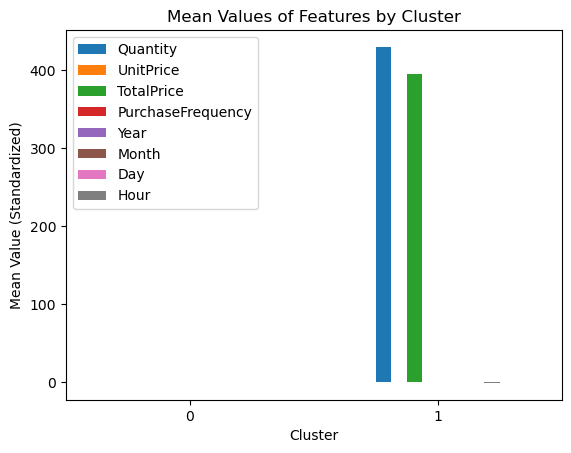

In [85]:
# Visualize differences with bar charts
plt.figure(figsize=(12, 6))
mean_values.plot(kind='bar')
plt.title('Mean Values of Features by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value (Standardized)')
plt.xticks(rotation=0)
plt.legend(numerical_features)
plt.show()

<Figure size 1800x600 with 0 Axes>

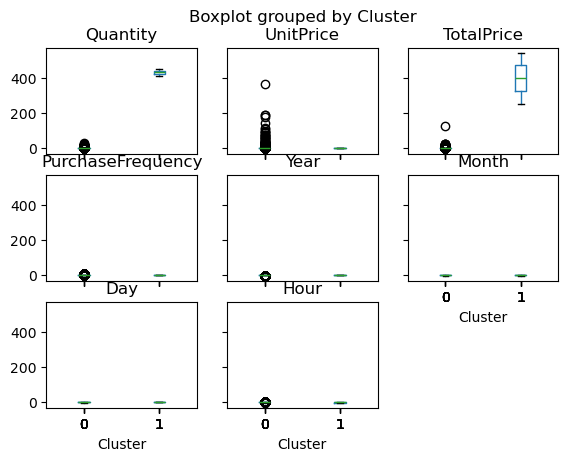

In [89]:
# Visualize differences with box plots
plt.figure(figsize=(18, 6))
df.boxplot(column=numerical_features, by='Cluster', grid=False)
plt.title('Box Plots of Features by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Value (Standardized)')
plt.xticks(rotation=0)
plt.show()

In [91]:
# -----------------------------------------------
# Final Output
# -----------------------------------------------
print("\nFinal Dataset Summary:")
print(f"Final dataset shape: {df.shape}")
print(f"Final dataset columns: {df.columns.tolist()}")
print("\nFirst 5 rows of final dataset:")
print(df.head())



Final Dataset Summary:
Final dataset shape: (392692, 51)
Final dataset columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country_Australia', 'Country_Austria', 'Country_Bahrain', 'Country_Belgium', 'Country_Brazil', 'Country_Canada', 'Country_Channel Islands', 'Country_Cyprus', 'Country_Czech Republic', 'Country_Denmark', 'Country_EIRE', 'Country_European Community', 'Country_Finland', 'Country_France', 'Country_Germany', 'Country_Greece', 'Country_Iceland', 'Country_Israel', 'Country_Italy', 'Country_Japan', 'Country_Lebanon', 'Country_Lithuania', 'Country_Malta', 'Country_Netherlands', 'Country_Norway', 'Country_Poland', 'Country_Portugal', 'Country_RSA', 'Country_Saudi Arabia', 'Country_Singapore', 'Country_Spain', 'Country_Sweden', 'Country_Switzerland', 'Country_USA', 'Country_United Arab Emirates', 'Country_United Kingdom', 'Country_Unspecified', 'TotalPrice', 'Year', 'Month', 'Day', 'Hour', 'PurchaseFrequency', 'Cluster']
